In [1]:
from valet import transition_analysis_utils as tau

In [2]:
hole_cubeFile = "./data/tq-td_State1-GS.cube"
particle_cubeFile = "./data/tq-td_State1-ES.cube"

# Load the the two cube files corresponding to hole (ground state) and particle (excited state)
transition = tau.load_transition(hole_cubeFile, particle_cubeFile)

In [3]:
# Compute the weighted Voronoi diagram and accumulate charges for each atom
segment_array = tau.compute_atomic_charges([transition])

In [4]:
# Provide the grouping of atoms in meaningful subgroups
subgroup_names = ["THIO", "QUIN"]
atom_subgroup_map = [-1] * transition.num_atoms()
# In this case the first 8 atoms belong to Thiophene while the rest of the atoms belong to Quinoxaline
atom_subgroup_map[:8] = [0] * 8
atom_subgroup_map[8:] = [1] * (transition.num_atoms() - 8)
subgroup_info = tau.SubgroupInfo()
subgroup_info.set_subgroups(subgroup_names, atom_subgroup_map)

In [5]:
# Compute the charges and the amount of charge transfer between subgroups
tau.compute_subgroup_charges(transition, subgroup_info)

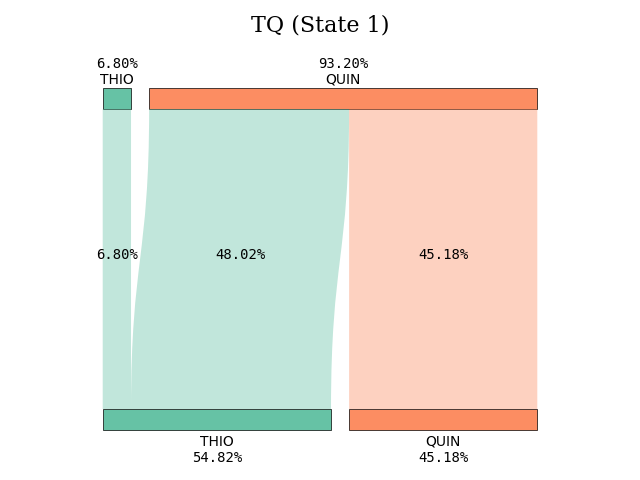

In [6]:
# Generate and plot the Transition Diagram
%matplotlib widget
tau.create_diagram(subgroup_info, title="TQ (State 1)")